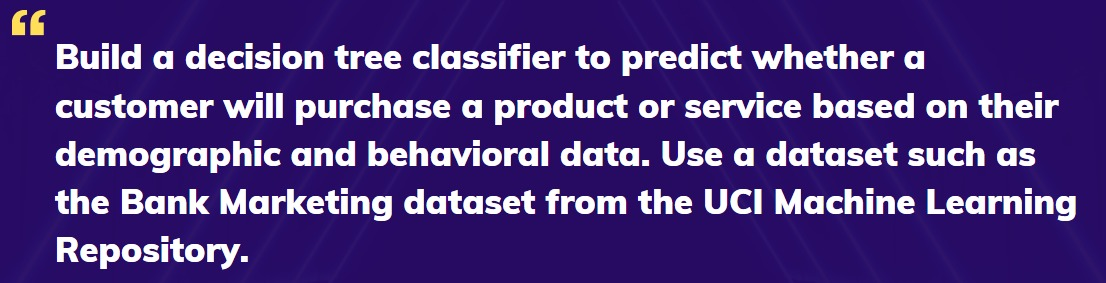

In [1]:
from IPython.display import Image
Image(filename='C:/Users/Pradeep Mishra/Downloads/task03.jpeg')


# Decision Tree Classifier 
### To predict whether customer will purchase a product or a service based on their demographic and behavioural data

## Importing Dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:/Users/Pradeep Mishra/Downloads/bank.csv',sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Data cleaning

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.mean()

C:\Users\Pradeep Mishra\AppData\Local\Temp\ipykernel_12596\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64

## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df=df.rename(columns={'y':'result'})
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,result
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Model Building 

In [9]:
X = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = df['result']


In [10]:
# Checking the biasness of the data 
X_encoded = pd.get_dummies(X)
y_encoded = y.replace({'yes': 1, 'no': 0})
df['result'].value_counts()

no     4000
yes     521
Name: result, dtype: int64

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------------------------
# Creating a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier on the data
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)


In [12]:
# Evaluating the performance of the model (for example, using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8640883977900552


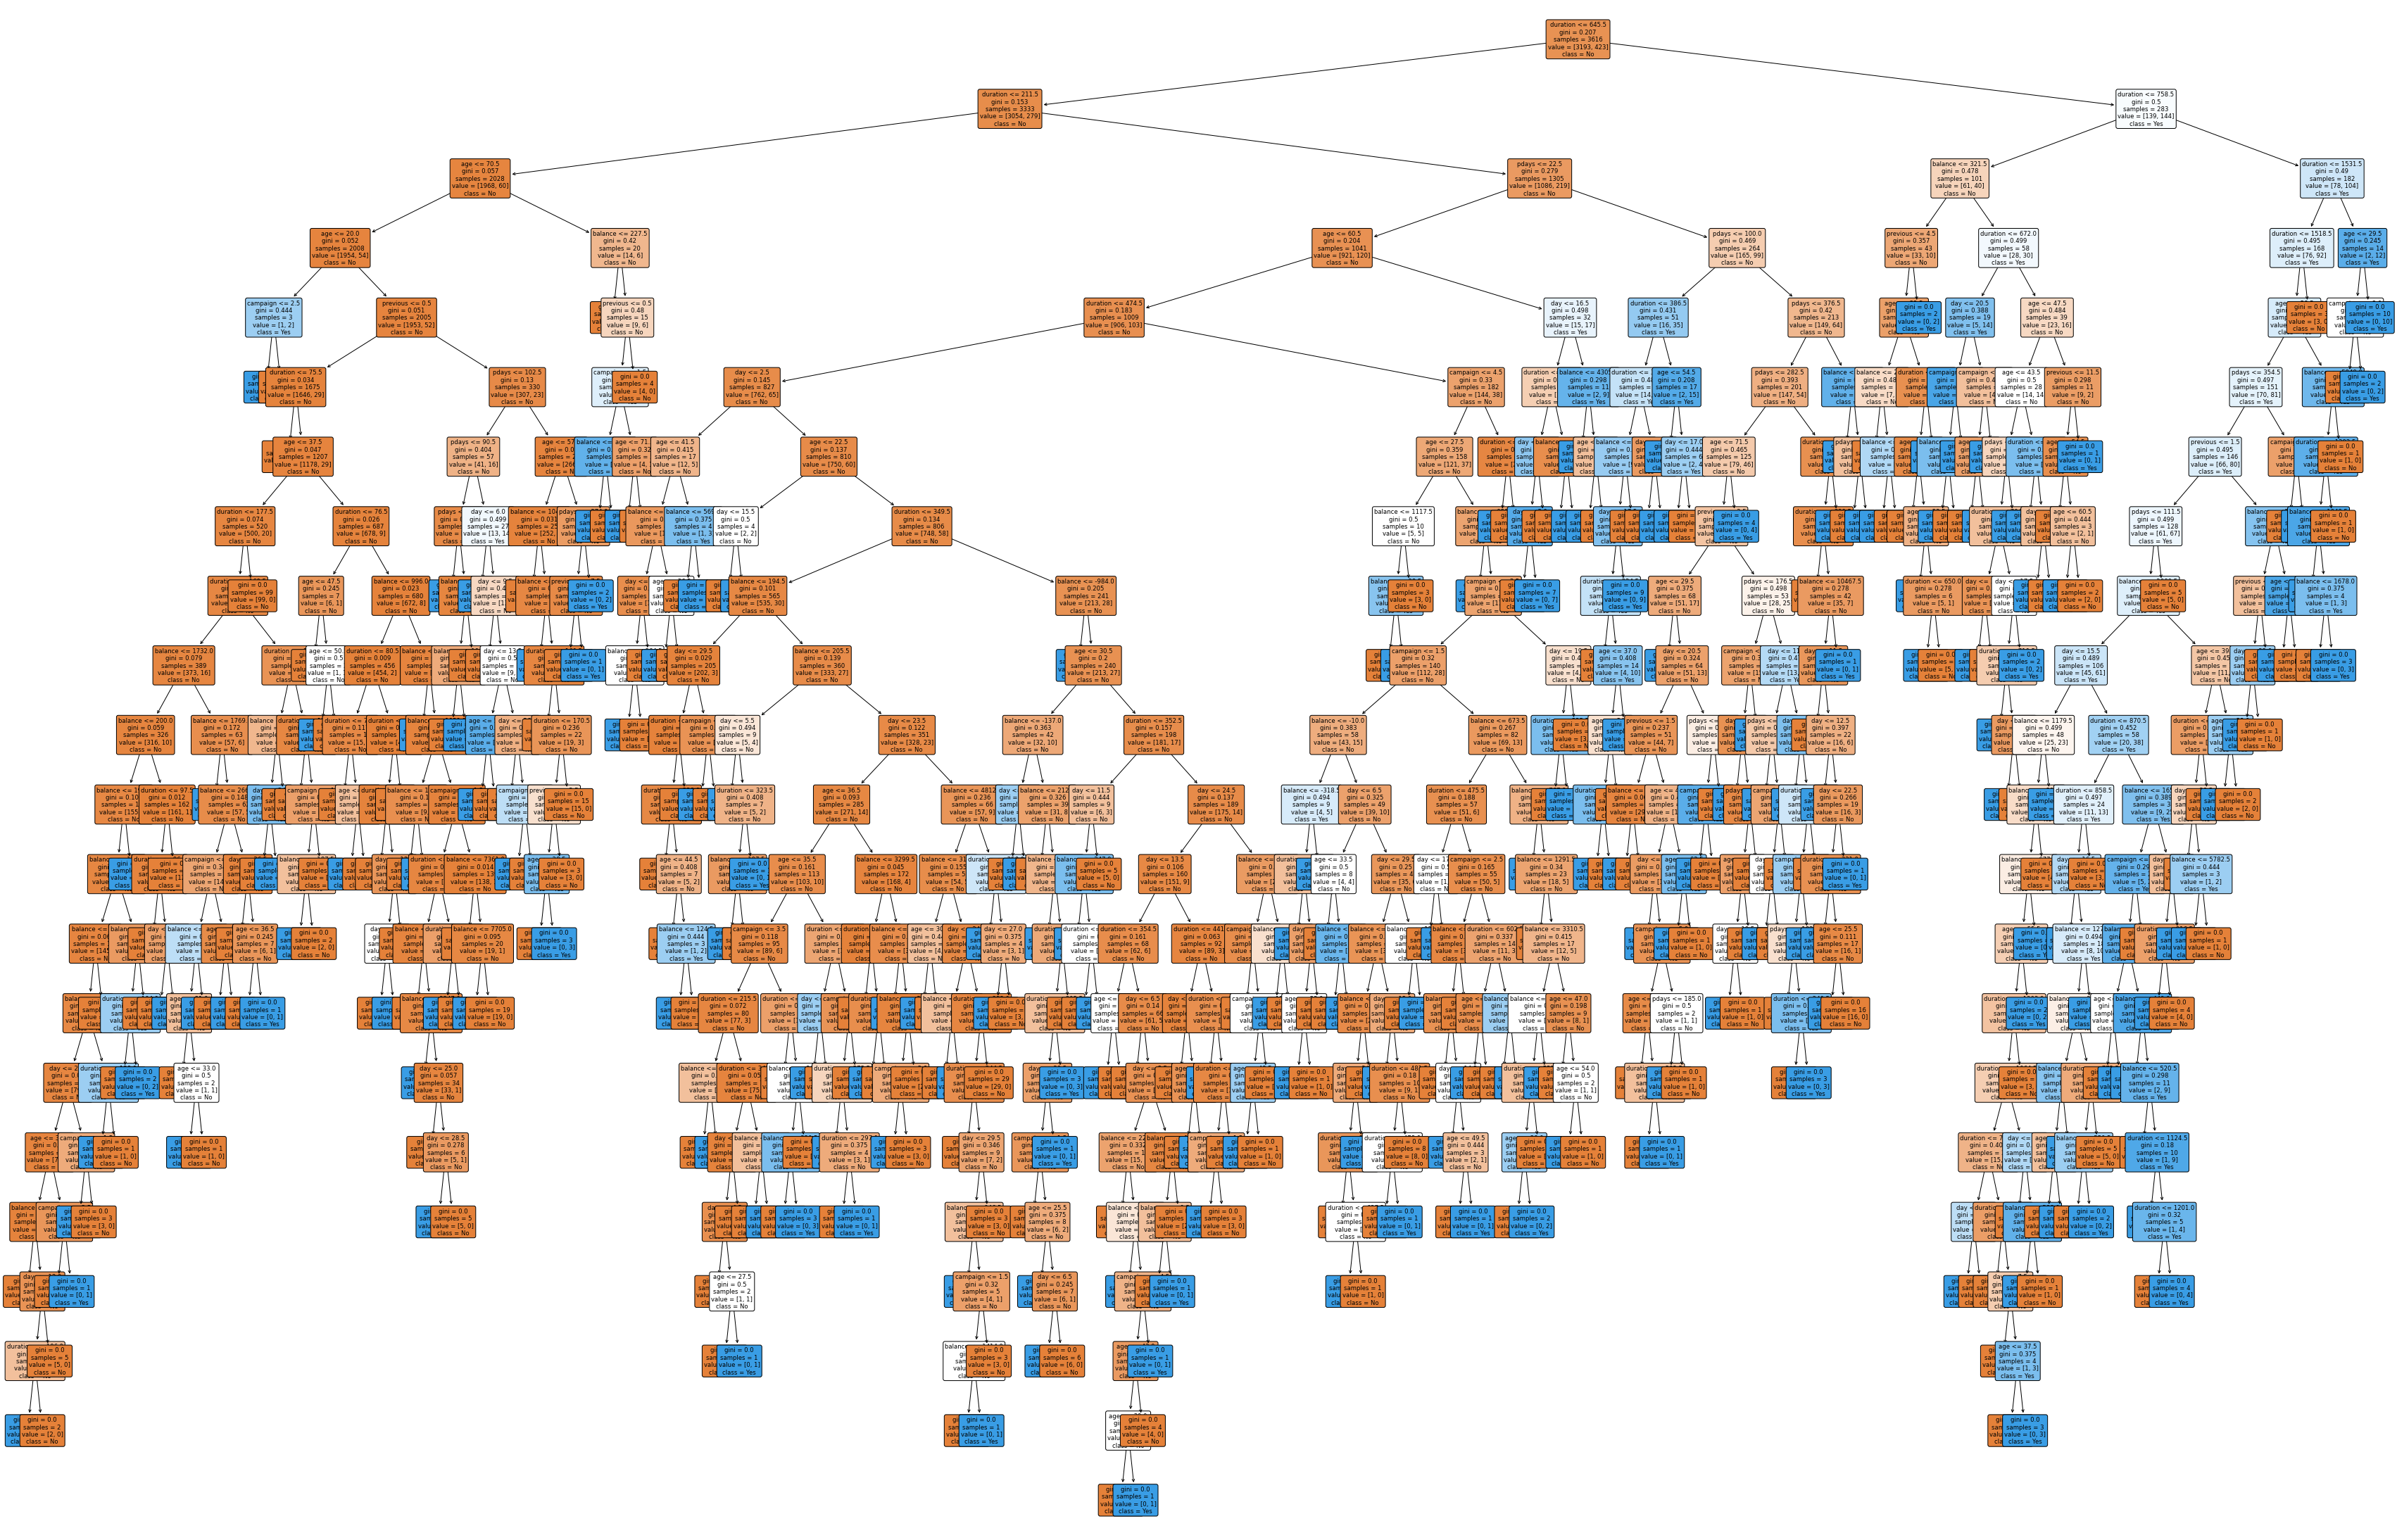

In [13]:
# ploting the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'], rounded=True,fontsize=8.5)
plt.show()

In [14]:
importances=clf.feature_importances_
feature_names=X_encoded.columns
feature_importance=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importance=feature_importance.sort_values(by='Feature',ascending=True)
print(feature_importance)

    Feature  Importance
0       age    0.145959
1   balance    0.202474
4  campaign    0.054290
2       day    0.137127
3  duration    0.312595
5     pdays    0.123354
6  previous    0.024201


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       807
           1       0.37      0.37      0.37        98

    accuracy                           0.86       905
   macro avg       0.65      0.65      0.65       905
weighted avg       0.86      0.86      0.86       905



In [16]:
best_params = {'max_depth': 5, 'min_samples_split': 3,'min_samples_leaf':4, 'criterion': 'gini'}

clf_tuned=DecisionTreeClassifier(**best_params)
clf_tuned.fit(X_train,y_train)
y_pred_tuned=clf_tuned.predict(X_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test,y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.52      0.35      0.42        98

    accuracy                           0.90       905
   macro avg       0.72      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



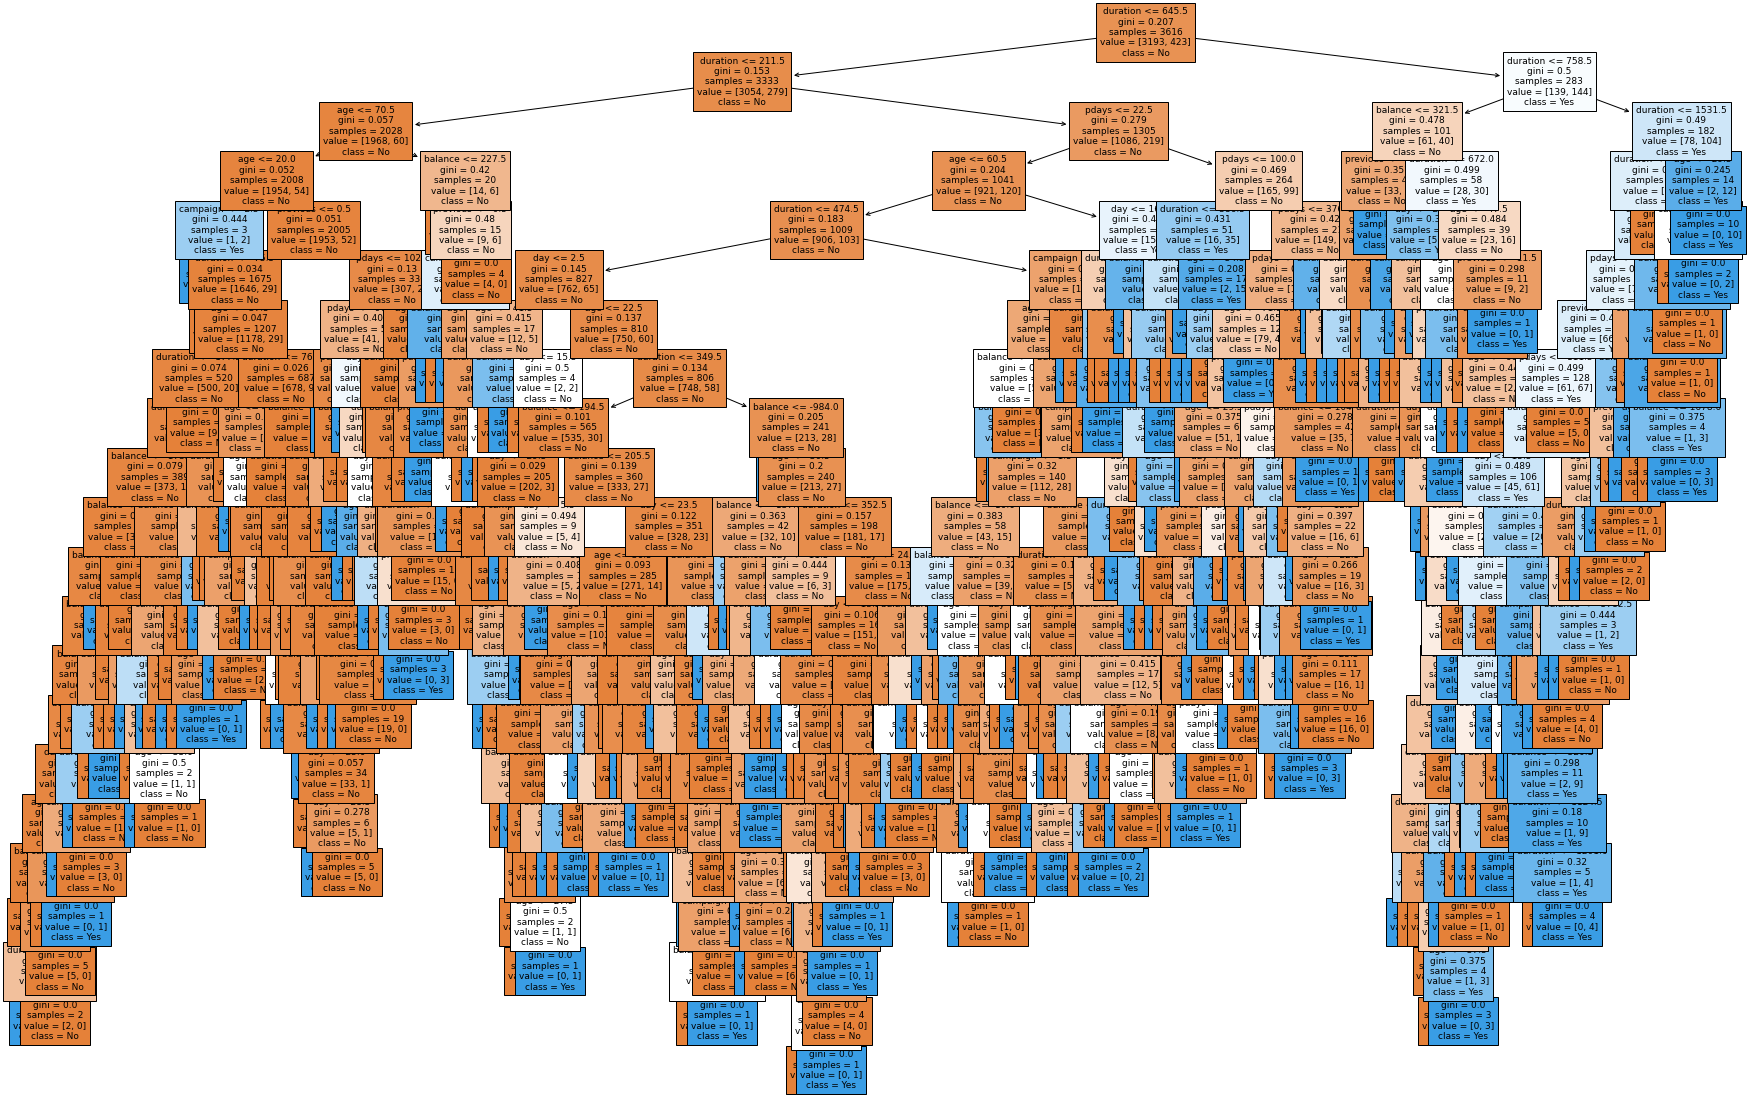

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))
plt.title("Decision Tree")
plot_tree(clf, feature_names=X_encoded.columns, class_names=['No','Yes'], filled=True, fontsize=9)
plt.show()



#### Author: Shivsagar Mishra 
#### Linkedin: https://linkedin.com/in/shivsagar-mishra/